A few weeks ago, the R community went through some handwringing about plotting packages.
For outsiders (like me) the details aren't that important, but some brief background might be useful so we can transfer the takeaways to Python.
The competing systems are "base R", which is the plotting system built into the language, and ggplot2, Hadley Wickham's implemntation of the grammar of graphics.
For those interested in more details, checkout

- http://simplystatistics.org/2016/02/11/why-i-dont-use-ggplot2/
- http://varianceexplained.org/r/why-I-use-ggplot2/
- http://flowingdata.com/2016/03/22/comparing-ggplot2-and-r-base-graphics/

The most important takeaways, are that

1. Either system is capable of producing anything the other can
2. ggplot is usually better for exploratory analysis

Item 2 is not universally agreed upon, and it certainly isn't true for every type of chart, but I'm going to use it as fact for now.

I'm not foolish enough to attempt a formal analogy here, like matplotlib is python's base R.
But there's at least a rough comparison:
like ggplot2, the combination of pandas and seaborn allows for fast iteration and exploration. You can quickly explore a dataset and transformations of that dataset.
When you need to, you can "drop down" into matplotlib for further refinement.

# Overview

Here's a brief sketch of the plotting landscape as of April 2016.
For some reason, plotting tools feel a bit more personal than other parts of this series so far, so I feel the need to blanket this who discussion in a cavet: this is my personal take, shaped by my personal background and tastes, on how to handle plotting in Python.

## [Matplotlib](http://matplotlib.org/)

Matplotlib is an amazing project, and is the foundation of pandas' built-in plotting and Seaborn.
Matplotlib handles everything from the actual drawing to the screen, to several APIs of various levels.
I've found knowing the [pyplot api](http://matplotlib.org/api/pyplot_api.html) useful.
You're less likely to need things like [Transforms](http://matplotlib.org/users/transforms_tutorial.html) or [artists](http://matplotlib.org/api/artist_api.html), but when you do the documentation is there.
I'll typically start with a pandas or seaborn plot, and then make adjustments with the pyplot API.

## [Pandas' builtin-plotting](http://pandas.pydata.org/pandas-docs/version/0.18.0/visualization.html)

`DataFrame` and `Series` have a `.plot` namespace, with various chart types available (`line`, `hist`, `scatter`, etc.).
Pandas objects additional metadata available that can be used to enhance plots (the Index for a better automatic x-axis then `range(n)` or Index names as axis labels for example).

And since pandas had fewer backwards compatability constraints, it had a bit better default aesthetics, though matplotlib is addressing this in [matplotlib 2.0](http://matplotlib.org/style_changes.html).

At this point, I see pandas `DataFrame.plot` as a useful exploratory tool for quick throwaway plots.

## [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/)

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/), created by Michael Waskom, "provides a high-level interface for drawing attractive statistical graphics." Seaborn gives a great API for quickly exploring different visual representations of your data. We'll be focusing on that today

## [Bokeh](http://bokeh.pydata.org/en/latest/)

[Bokeh](http://bokeh.pydata.org/en/latest/) is a (still under heavy development) visualiztion library that targets the browser.

Like matplotlib, Bokeh has a few APIs at various levels of abstraction.
They have a glyph API, which I suppose is most similar to matplotlib's Artists API, for drawing single or arrays of glpyhs (circles, rectangles, polygons, etc.).
More recently they introduced a Charts API, for producing canned charts from data structures like dicts or DataFrames.

## Other Libraries

This is a (probably incomplete) list of other visualization libraries that I don't know enough about to comment on

- [Lightning](http://lightning-viz.org/)
- [HoloViews](http://holoviews.org/)
- [Glueviz](http://www.glueviz.org/en/stable/)
- [vispy](http://vispy.org/)
- [bqplot](https://github.com/bloomberg/bqplot)

# Examples

We'll use the `diamonds` dataset from ggplot2.
You could use Vincent Arelbundock's RDatasets to find it (`pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv')`), but I wanted to checkout [feather](https://github.com/wesm/feather).

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
suppressPackageStartupMessages(library(ggplot2))
library(feather)
write_feather(diamonds, 'diamonds.fthr')


Error in library(ggplot2) : there is no package called ‘ggplot2’


/Users/tom.augspurger/Envs/blog/lib/python3.5/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in library(ggplot2) : there is no package called ‘ggplot2’

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [3]:
import feather
df = feather.read_dataframe('diamonds.fthr')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null category
color      53940 non-null category
clarity    53940 non-null category
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int32
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: category(3), float64(6), int32(1)
memory usage: 2.8 MB


In [5]:
import bokeh.charts as bc
import bokeh.plotting as bk

In [6]:
from bokeh.plotting import figure
from bokeh.embed import components

Bokeh provides two APIs, a low-level glyph API and a higher-level Charts API.

In [7]:
fig = (df.assign(xy = df.x / df.y)
         .sample(n=500)
         .pipe(bc.Scatter, "xy", "price"))
bk.show(fig)

It's not clear to me where the scientific community will come down on Bokeh for exploratory analysis.
The ability to share interactive graphics is compelling.
Personally, I have a lot of intertia in matplotlib that I haven't switched to Bokeh for day-to-day exploratory analysis.

I have greatly enjoyed Bokeh for building dashboards and [webapps](http://bokeh.pydata.org/en/latest/docs/user_guide/interaction.html) with bokeh server.
It's still young, and I've hit [some rough edges](http://stackoverflow.com/questions/36610328/control-bokeh-plot-state-with-http-request).
The Bokeh team is trying to bridge a tough space.

In [8]:
sns.set(context='talk', style='ticks')

%matplotlib inline

# Matplotlib

Since it's relatively new, I should point out that matplotlib 1.5 added support for plotting labeled data.

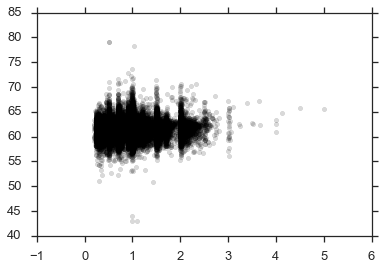

In [10]:
fig, ax = plt.subplots()

ax.scatter(x='carat', y='depth', data=df, c='k', alpha=.15)

This isn't limited to just `DataFrame`s.
It supports anything that uses `__getitem__` (square-brackets) with string keys.

## Pandas Built-in Plotting

The metadata in DataFrames gives a bit better defaults on plots.

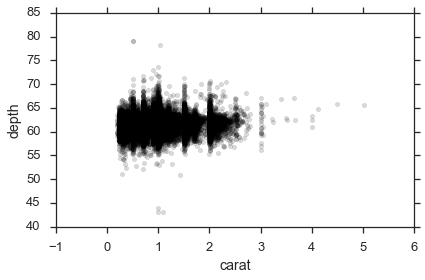

In [11]:
df.plot.scatter(x='carat', y='depth', c='k', alpha=.15)
plt.tight_layout()

We get axis labels from the column names.
Nothing major, just nice.

Pandas can be more convienient for plotting a bunch of columns with a shared x-axis (the index).

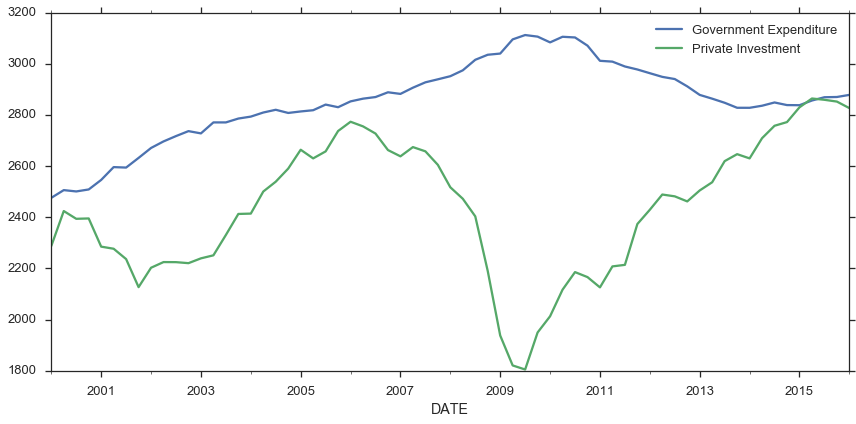

In [13]:
from pandas_datareader import fred

gdp = fred.FredReader(['GCEC96', 'GPDIC96'], start='2000-01-01').read()

gdp.rename(columns={"GCEC96": "Government Expenditure",
                    "GPDIC96": "Private Investment"}).plot(figsize=(12, 6))
plt.tight_layout()

## Seaborn

The rest of this post will focus on seaborn, and why I think it's especially great for exploratory analysis.

I would encourage you to read Seaborn's [introductory notes](https://stanford.edu/~mwaskom/software/seaborn/introduction.html#introduction) that lay its design philosophy and attempted goals. Some highlights:

> Seaborn aims to make visualization a central part of exploring and understanding data.

It does this through a consistent, understandable API.

> The plotting functions try to do something useful when called with a minimal set of arguments, and they expose a number of customizable options through additional parameters.
 
Which works great for exploratory analysis, with the option to turn that into something more complex if it looks promising.

> Some of the functions plot directly into a matplotlib axes object, while others operate on an entire figure and produce plots with several panels.

The fact that seaborn is built on matplotlib means that if you are familiar with the pyplot API, you're knowledge will still be useful.

Most seaborn plotting functions (one per chart-type) take a `x`, `y`, `hue`, and `data` arguments (not all are required or used, depending on the plot type). If you're working with DataFrames, you'll pass in strings referring to column names for `x` and `y`, and the DataFrame for `data`.

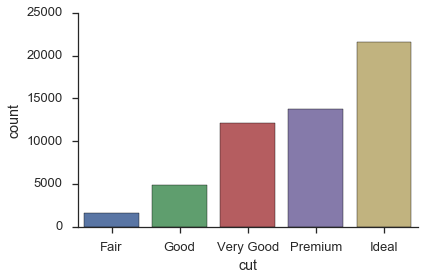

In [14]:
sns.countplot(x='cut', data=df)
sns.despine()
plt.tight_layout()

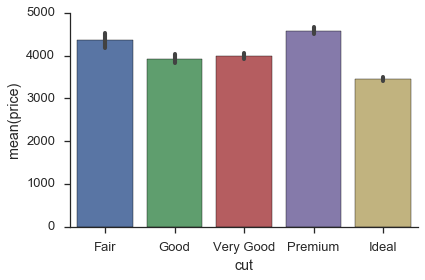

In [15]:
sns.barplot(x='cut', y='price', data=df)
sns.despine()
plt.tight_layout()

Bivariate relationships can easily be explored, either one at a time:

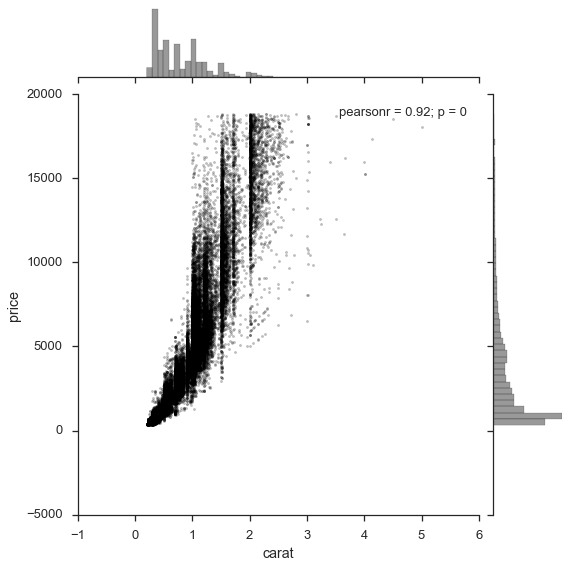

In [16]:
sns.jointplot(x='carat', y='price', data=df, size=8, alpha=.25,
              color='k', marker='.')
plt.tight_layout()

Or many at once

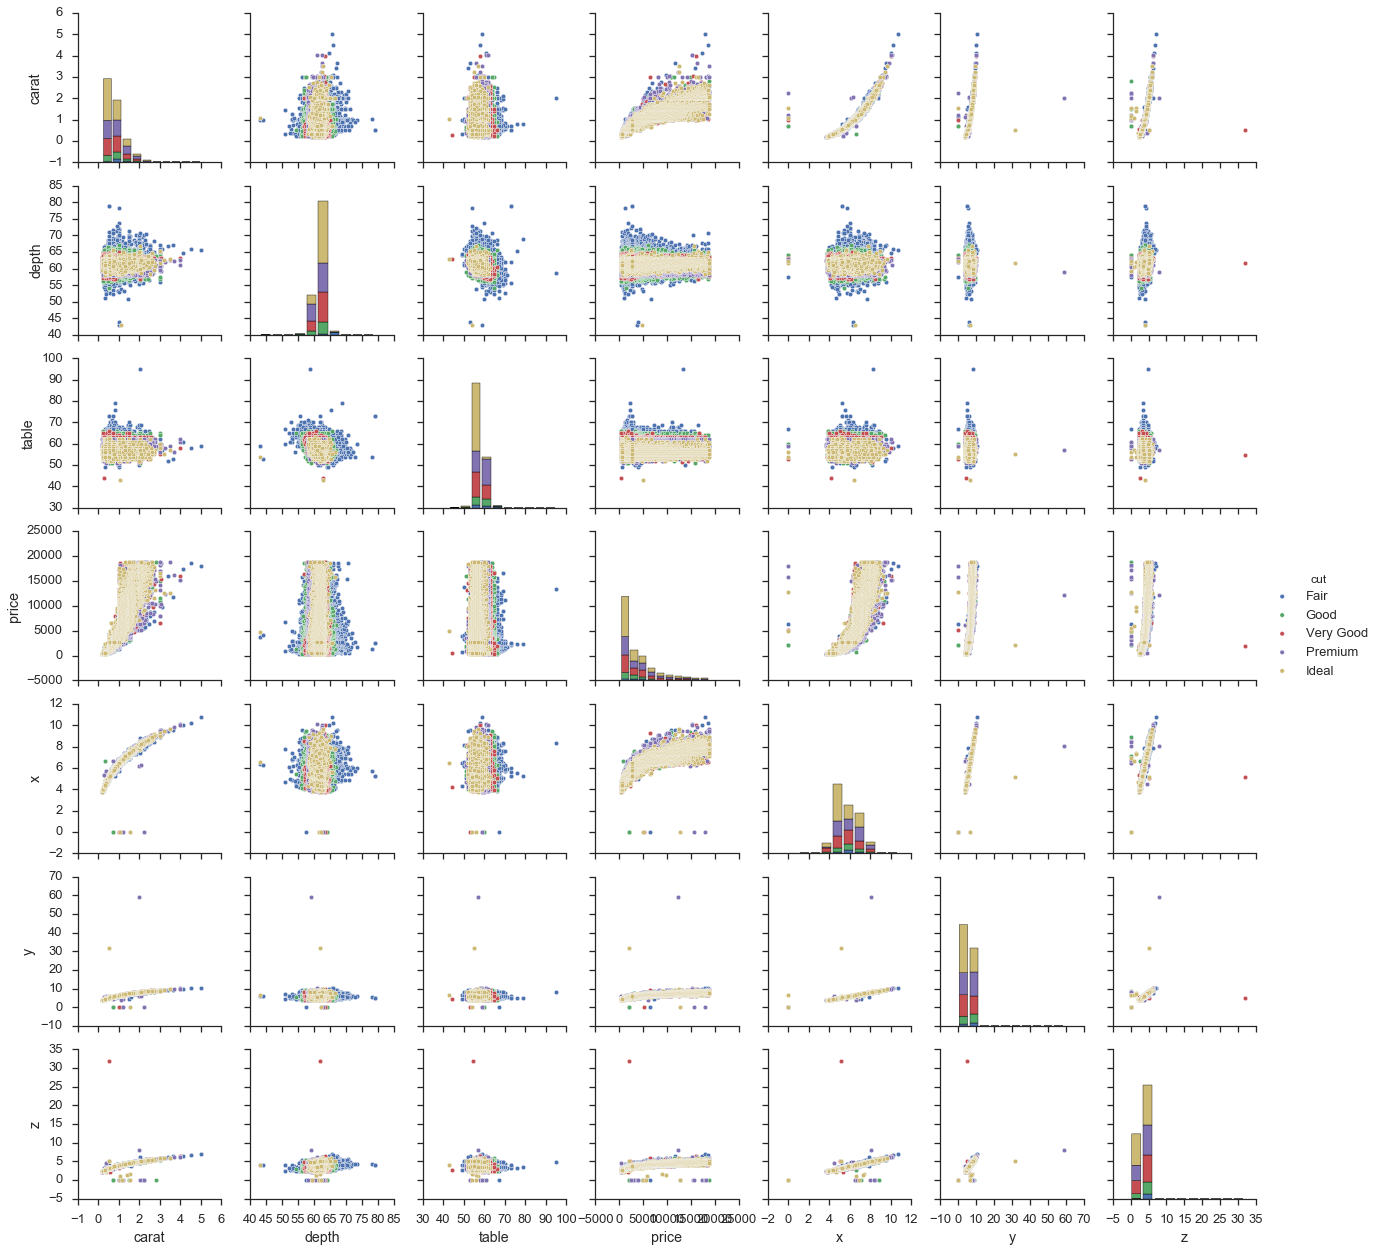

In [17]:
g = sns.pairplot(df, hue='cut')

`pairplot` is a concenince wrapper around `PairGrid`, and offers our first look at an important seaborn abstraction, the `Grid`. Seaborn `Grids` provide a link between matplolib `Figure`s with multiple `axes`, and features in your dataset.

There are two main ways of interacting with grids. First, seaborn provides convience-wrapper functions like `pairplot`, that have good defaults for common tasks. If you need more flexibility, you can work with the `Grid` directly by mapping plotting functions over each axes.

In [18]:
x = df.select_dtypes(include=[np.number])

In [19]:
x[(x > x.quantile(.05)).all(1) & (x < x.quantile(.95)).all(1)]

,carat,depth,table,price,x,y,z
60,0.35,60.9,57.0,552,4.54,4.59,2.78
64,0.42,61.5,59.0,552,4.78,4.84,2.96
66,0.32,62.0,55.3,553,4.39,4.42,2.73
68,0.31,61.8,58.0,553,4.35,4.32,2.68
83,0.38,61.6,56.0,554,4.65,4.67,2.87
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [20]:
def core(df, α=.05):
    mask = (df > df.quantile(α)).all(1) & (x < df.quantile(1 - α)).all(1)
    return df[mask]

/Users/tom.augspurger/Envs/blog/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


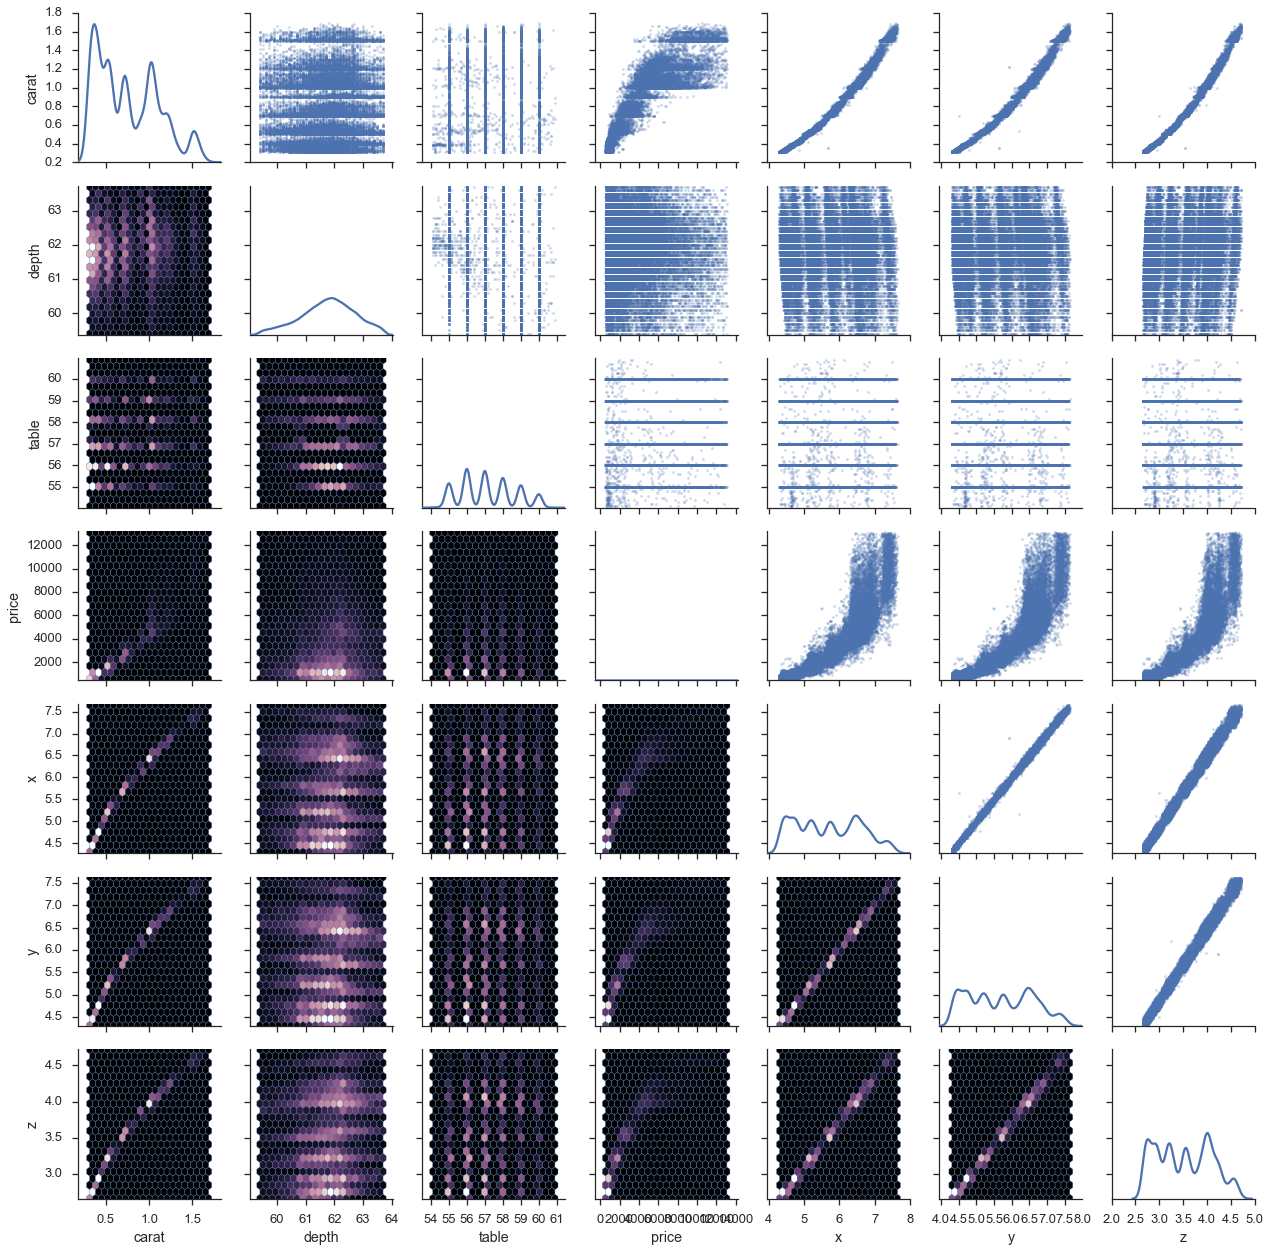

In [92]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

(df.select_dtypes(include=[np.number])
   .pipe(core)
   .pipe(sns.PairGrid)
   .map_upper(plt.scatter, marker='.', alpha=.25)
   .map_diag(sns.kdeplot)
   .map_lower(plt.hexbin, cmap=cmap, gridsize=20)
)

`FacetGrid` is another class for producing `Grid`s, with control over how each facet (individual axes) gets determined. `PairGrid` is a special case of faceting by each `(x, y)` combination. In this next example, we'll facet by `cut`.

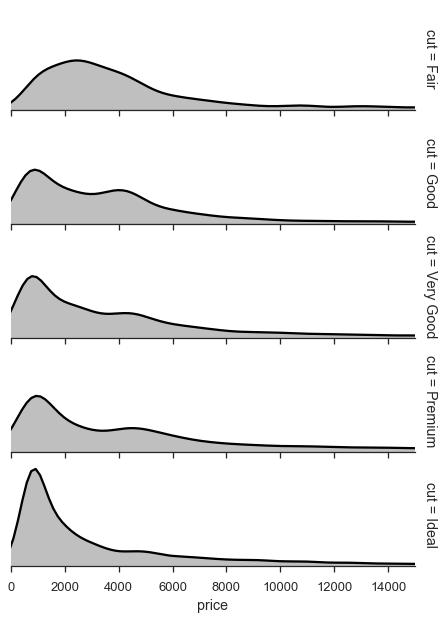

In [22]:
g = sns.FacetGrid(df, row='cut', aspect=4, size=1.76, margin_titles=True)
g.map(sns.kdeplot, 'price', shade=True, color='k')
for ax in g.axes.flat:
    ax.yaxis.set_visible(False)
sns.despine(left=True)
g.fig.subplots_adjust(hspace=0.1)
g.set(xlim=(0, 15000))

This last example shows the tight integration with matplotlib. `g.axes` is an array of `matplotlib.Axes` and `g.fig` is a `matplotlib.Figure`.
This is a pretty common pattern when using seaborn: use a seaborn plotting method (or grid) to get a good start, and then adjust with matplotlib as needed.

I *think* (not an expert on this at all) that one thing people like about the grammar of graphics is its flexibility.
You aren't limited to a fixed set of chart types defined by the library author.
Instead, you construct your chart by layering scales, aesthetics and geometries.

That said, I wouldn't really call what seaborn / matplotlib offer that limited.
You can create pretty complex charts suited to your needs.

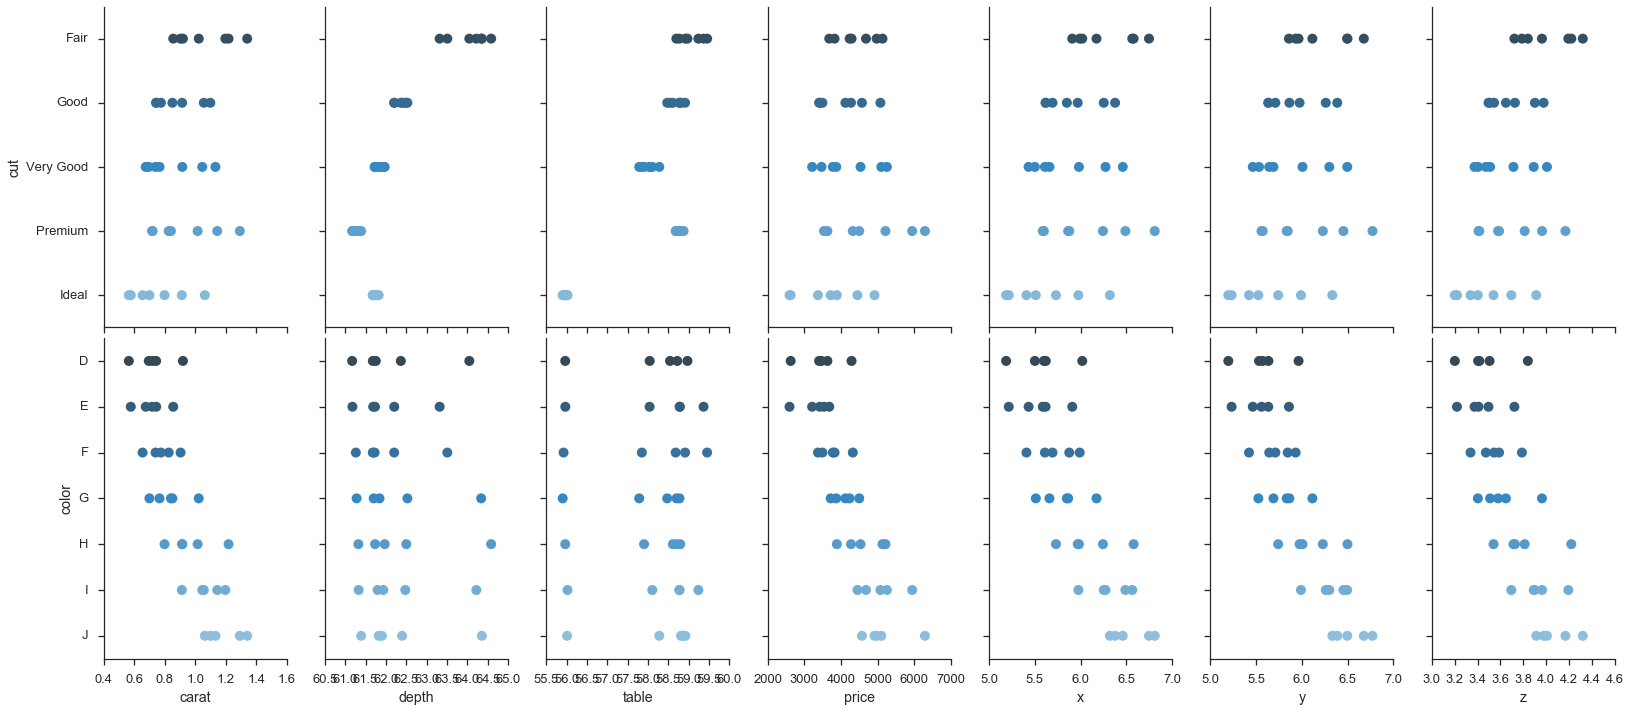

In [23]:
agged = df.groupby(['cut', 'color']).mean().sort_index().reset_index()

g = sns.PairGrid(agged, x_vars=agged.columns[2:], y_vars=['cut', 'color'],
                 size=5, aspect=.65)
g.map(sns.stripplot, orient="h", size=10, palette='Blues_d')
plt.tight_layout()

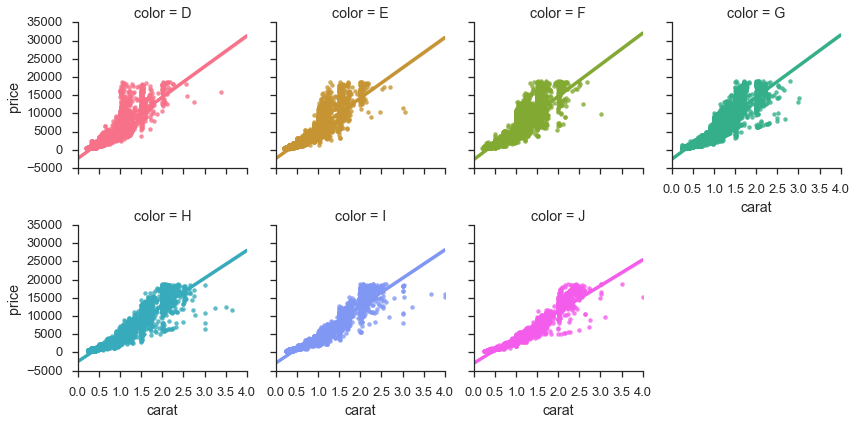

In [24]:
g = sns.FacetGrid(df, col='color', hue='color', col_wrap=4)
g.map(sns.regplot, 'carat', 'price')

Initially I had many more examples showing off seaborn, but I'll spare you.
Seaborn's [documentation](https://stanford.edu/~mwaskom/software/seaborn/) is thorough (and just beautiful to look at).

We'll end with a nice scikit-learn integration for exploring the parameter-space on a GridSearch object.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [26]:
df = sns.load_dataset('titanic')

clf = RandomForestClassifier()
param_grid = dict(max_depth=[1, 2, 5, 10, 20, 30, 40],
                  min_samples_split=[2, 5, 10],
                  min_samples_leaf=[2, 3, 5])
est = GridSearchCV(clf, param_grid=param_grid, n_jobs=4)

y = df['survived']
X = df.drop(['survived', 'who', 'alive'], axis=1)

X = pd.get_dummies(X, drop_first=True)
X = X.fillna(value=X.median())
est.fit(X, y);


In [27]:
scores = est.grid_scores_
rows = []
params = sorted(scores[0].parameters)
for row in scores:
    mean = row.mean_validation_score
    std = row.cv_validation_scores.std()
    rows.append([mean, std] + [row.parameters[k] for k in params])
scores = pd.DataFrame(rows, columns=['mean_', 'std_'] + params)


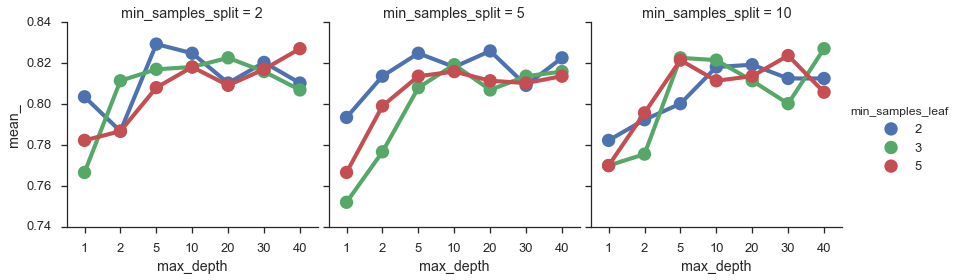

In [28]:
sns.factorplot(x='max_depth', y='mean_', data=scores, col='min_samples_split',
               hue='min_samples_leaf')